## Text Categorization and perform Classification for Biomedical.

Task:
* Create the Classification Model.
* Create the Topic Modelling Model.
* Make conclusion based on Simple Classification and Topic Modelling. 

In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.0 MB/s eta 0:00:00


Library Import

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import string
import shap
import warnings
import textwrap

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize, treebank
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC, LinearSVC
from tensorflow.python.client import device_lib
from sklearn.decomposition import PCA, TruncatedSVD, NMF, LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from IPython import display
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore")

In [ ]:
print("Device Specifications:")
print(device_lib.list_local_devices())

Device Specifications:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18039153403490879032
xla_global_id: -1
]


Set matplotlib figure to SVG, so we can see high resolution picture.

In [ ]:
display.set_matplotlib_formats('svg')

Download necessary tools for NLTK.

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Set the stopwords. Additional stopwords are also been added, because some medical words are common for all types of cancer.

In [ ]:
biomedical_stopwords = set(stopwords.words("english"))
biomedical_stopwords = biomedical_stopwords.union({
    "used", "shown", "study", "observed",
    "patient", "found", "result", "effect", "reported",
    "performed", "identified", "well", "treatment",
    "available", "creative", "study", "case",
    "detected", "gene", "expression", "compared", "development",
    "presence", "patients", "analysis", "cells", "cell", 
    "cancer", "however", "included", "combination", "involved",
    "role", "common", "change", "data", "results", "24yearold",
    "additional", "file", "important", "considered",
    "change", "through", "also", "need", "non", "small",
    "number", "showed", "attribution", "calculated",
    "present", "obtained", "cases", "according", "known",
    "therefore", "set", "material", "method", "diagnosis", 
    "based", "evaluated", "credit", "increase", "risk", "factor",
    "et", "al", "sample"
})

noise_stopwords = ["001ab", "001î¼mg", "003ab", "003b", "004a", "004cd", "004cdf", "004î¼mg", "005", "005a", "005bc", "008c", "008dcapacityî¼mg", "009c", "012a", "012cd", "013b", "014ab", "0154b", "016abc", "016bcd", "024a", "024ab", "024bc", "025a", "028a", "028cd", "02a", "02ab", "02cd", "02ddata", "033abc", "034ab", "038ab", "038abc", "041abefore", "042ab", "04ab", "055ab", "057abc", "05a", "05ab0b", "061ab", "067bc", "075c", "087c", "0929babbreviations", "094bc", "0a", "0anisotropy", "0h", "10", "100", "1000a", "1005a", "100e", "100g", "101002152141412001043143c1150aidimmu11503e30co2v", "101002dc23703", "101002path2264", "101007s11010019035178", "101007s1209401819594", "101016jbbi202004080", "101016jbiopha201802028", "101016jcell201701017", "101016jcell202004035", "101016jcoi201803004", "101016jcyto201505026", "101016jicrp200905004croua", "101016jjbior201308006", "101016jjneumeth2004cdc", "101016jmolmed200709002", "101016jophtha201404027", "101016jtig201708002", "101016jvirol20150601", "101016jyexcr201702003", "101016jyjmcc202005007", "101016s0140673617333263", "101016s0889852905702991", "101016s0966842x97817684", "101016s147020450970364x", "10103835021093", "101038nrendo2011142", "101038nrendo2016110", "101038nrg201510", "101038nrg201620", "101038nrm2672", "101038nrmicro2147", "101038onc2008346", "101038s4156902003605", "101038s4158102002847", "101038s4158801802523", "101038sjneo7900124", "101042bj20100323", "101042cs20191211activator", "101042cs20191211figure", "101042cs20191211inactivation", "101042cs20191211need", "101042cs20191211pancreatic", "101042cs20191211recruitment", "101042cs20191211the", "101042cs20200904", "101046j14321033200203181x", "101086378588", "101093ibdizaa131", "101096fj201802418r", "101097ede0000000000000164", "101111cas12996", "101111cbdd12889", "101111jebm12141", "101111jgh15047", "101128jvi0257613", "101128mbio0063815", "101136heartjnl2020317025", "101136hrt2005072280", "10115810780432ccr041518", "10116101cir000005754582749ff", "101164ajrccm16252002108", "101172jci60331", "1011830903193600036707", "101210jc20091779", "1012lhaptoglobin", "101371", "101371journalpone0237244t002p", "101371journalpone0237244t003baseline", "101371journalpone0237911g002possibility", "101371journalppat1007390", "101534genetics106057034", "101590s003489102013047003851", "101e", "102ab", "1031091040836320151020358", "103322caac21233", "103390ijms21093179", "1036e", "103892ijmm20141901", "103892mmr201910671", "1038e", "103e", "105009gnl15257", "105c", "105g", "1065e", "106ab", "106e", "106ml", "106well", "107150ijbs4874", "1072e", "1072e9the", "1075a", "1089e", "108e", "10962abc", "109l", "109lbasophils", "109leosinophils", "109lhaemoglobin", "109lleucocytes", "109llymphocytes", "109lneutrophils", "109lthrombocytes", "109p", "10a", "10acirsci", "10bmutational", "10cm", "10mm", "10q2331", "10ã", "11", "110", "110e", "1110e", "1111a", "112abugg", "1132a", "1133abc", "113e", "1148cf", "1151e", "115e", "116b", "11722571913", "1183ab", "1184a", "118e", "11916565233", "11ã", "12", "1225380275", "1245a", "1275a", "127e", "1288e1274scholl", "128e", "129e", "129svev", "12k", "12ã", "13", "130b", "13120502246", "1325cf", "132af", "1333c", "133b", "1350abz", "1350af", "135abt", "135c", "136e", "1393e", "1394a", "139a", "13lna2", "13ã", "14", "14420502249", "145zeb2axis", "1467bcd", "14735a", "1475ab", "147e", "14bmnasf", "14ã", "15", "1500a", "150a", "150e", "151a", "151c", "1522e", "1525a", "1528e", "154e", "157e", "1593e", "15a", "15deoxyspergualin", "15e6", "15ã", "160e", "1611e", "161a", "161ab", "1625a", "162e", "1633a", "1642a", "1650at", "166e", "1670af", "167ab", "167î¼gml", "1683e3", "169a", "16group", "16hbet0t24t48no", "16ã", "17", "1700af", "171e", "1725a", "175a", "175c", "175e", "1760", "1767ab", "1780e", "17a", "17ab", "17ã", "1817a", "181e07127e01352e08977e01175e01929e02394e01671e01858e20321e25412e04575e01600e04219e01782e02luad", "1829e", "1843e", "184a", "185a", "1867abc", "186a", "1873cd", "188e", "18a", "18fdg", "18fdgrai", "18ã", "190e", "196ab", "1994e", "19ã", "1adjusted", "1c", "1dauc", "1department", "1division", "1ly2", "1st", "1stresponder", "1v2", "1ã", "1ã¾ã", "1î", "1î²1î³1and", "1î²2", "1î²2î³1", "20", "200", "2008e", "200bp", "2014", "2018520findpossible", "2018a", "2018b", "201a", "2025a", "203e", "20884a", "208a", "208bc", "20e1", "2117e", "211enhcre", "2135e", "217e", "219a", "2202e", "221a", "221e", "223e", "225ab", "225e", "226bc", "2275a", "227e08115e01801e03234e01265e05462e01198e01461e04467e12943e06256e01727e02439e01178e06599e01lusc", "234a", "2359gausp20a675tmex3bs256ymuc13t30azbtb10r456qslc26a3v54ic9orf84e8dppp1r36r303cplekha6q171ssh3p639pdscaml1g1252dslco1c1r639kendova2vcol9a1a680tmc2rf228lbpifb2a427slohchr812546", "235e", "2369458335", "2377cdkn2absnd861nsupt6hi104tplekhf1d258dlohchr221716", "2379e", "2383ab", "238ab", "238e", "239b", "243adata", "244e", "2450a", "2456cde", "2465de", "2467b", "246a", "24727a", "248a", "248e1", "2495cgg", "250fold", "2518a", "2519e", "251a", "251bc", "251e", "254a", "256a", "2575a", "2586e", "258a", "25a", "25g", "25ohvitamin", "25th", "26", "2609e", "262e", "2642a", "264a", "264e", "269a", "26a5p", "273a", "2750a", "275a", "279a", "27e", "280e8", "282e", "283a", "283ab", "284a", "284f219", "284f219mir", "2850at", "285e", "2887af", "2899e6", "2942a", "2a", "2a2b", "2b", "2base", "2bc", "2c", "2d2", "2distribution", "2ercre", "2f", "2g", "2galiquots", "2h2o", "2in", "2m", "2mî", "2peffective", "2pn", "2pnn", "2por", "2pyes", "2square", "2test", "2testage", "2the", "2¼", "2ã", "2ã¾sdnn", "2î", "2î²1î³1", "2ï", "30", "300abc", "3025bcf", "3067a", "30mgg", "310e", "313e", "316a", "3171bc", "318cde", "32", "323e", "3321e", "333", "333a", "3396bc", "339e4", "33a", "343b", "345a", "3498a", "34a", "35", "3500abcf", "351e", "352a", "3569e", "35ab", "367e", "369awt", "369e", "36dmanp1", "3708b", "374e", "3823154564", "38k", "394ab", "398bcde", "3a", "3f23mbreast", "3p", "3pbrd4", "3pccar1", "3plow", "3pnfat5", "3prp11", "3shc", "3ã", "3î²1", "40", "400", "405e", "408e", "41", "4125a", "416a", "41e8", "4211e", "422e", "422e21120e05924e01492e06609e04409e01415e19727e27247e03164e01380e16388e20311e06844e46333e09shown", "424e", "426e", "42snmdpcr", "433a", "433bc", "437e", "4387e", "438e", "450a", "451bc", "4524e", "4574e", "4575a", "4575az", "46", "467a", "472a", "475a", "475e", "4825a", "488a", "48yr", "490e05er", "4948e", "498ab", "49î¼gml", "4a", "4abc", "4bc", "4bpositive", "4c", "4d", "4dgalp1", "4laminins", "4nxm0", "4nxm0colon", "4ã", "4î", "4î²1î³1", "500", "500e", "503e", "504e", "506e", "50bct", "50th", "516e", "517abc", "524e", "525a", "532nm", "5375az", "537a", "5400a", "5472can", "547e", "550a", "550af", "569e", "57", "582e", "583e565", "584e", "59", "590e06pr", "596bc", "5986e", "5ab", "5cid48", "5f", "5p", "5pas", "5pby", "5plncrna", "5ppfn2", "5pwe", "5pzfp91", "5pzfp91mir", "5r", "5ã", "60", "622e", "63", "6301a", "633a", "635a", "64e5revisiontotalhip", "650a", "653e15", "65b", "65e1", "65year", "65yr", "662e", "667bc", "66a", "66ab", "675a", "680", "6860e", "6862augg", "690e", "697e", "6itga6", "6s", "6ã", "6î²1", "6î²4", "701e7", "707e", "70mlmin173m2", "7156a", "716s", "7175awt", "71e13bold", "72115341765", "730e", "737e", "742a", "748134e", "74range", "753e747shi", "75a", "75th", "766a", "7699e", "7736e", "775a", "775az", "775î¼mg", "7765e", "78", "7fold", "7h2o", "7ifnî", "7nachrs", "7produced", "7ã", "80", "807e", "807e1", "80a", "8136e", "8164e", "818e", "8196", "821ab", "83", "842e", "85ab", "8636e", "871e", "878a", "884de", "8d", "8ã", "90th", "911e", "9230", "951e", "95ci", "962a", "966e", "969a", "978e", "979ab", "983e", "9941e", "99mtcal2o3", "99mtcdtpamod", "99mtcfec", "99mtcfecadt", "99mtcgttom", "9ã",]

biomedical_stopwords = biomedical_stopwords.union(noise_stopwords)

print(biomedical_stopwords)

{'study', '83', '1012lhaptoglobin', '101016jyexcr201702003', '101016jcell202004035', '1650at', '422e', '871e', '3708b', '451bc', '101016s0889852905702991', '437e', '3823154564', '2a', 'them', '101136hrt2005072280', 'calculated', "shan't", '132af', '12', '16ã', 'o', '101042cs20191211activator', '4574e', '4bc', '101016jvirol20150601', '1994e', '201a', '590e06pr', '101136heartjnl2020317025', '101016jophtha201404027', 'according', '161a', "weren't", '737e', '234a', '05a', '65year', '74range', '5r', '101046j14321033200203181x', '101371', '426e', '11', '101038nrendo2011142', 'such', 'had', '223e', '2h2o', '106ml', '7produced', '1dauc', '547e', 'how', '2450a', 'am', '4575az', '9230', 'at', 'an', '1829e', 'that', '6itga6', 'which', 'wouldn', '4575a', '2467b', 'all', '467a', 'change', '101210jc20091779', '1038e', '42snmdpcr', '90th', '16hbet0t24t48no', '15ã', '4dgalp1', '516e', '1475ab', '227e08115e01801e03234e01265e05462e01198e01461e04467e12943e06256e01727e02439e01178e06599e01lusc', 'down', '1

Store the Fields' Variable, so it can be easily changed later.

In [ ]:
index_field = "Index"
cancer_type_field = "Cancer_Type"
cancer_desc_field = "Cancer_Desc"

## Data Preparation

In [ ]:
! cp ./drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/
! kaggle datasets download -d falgunipatel19/biomedical-text-publication-classification

 73% 41.0M/55.9M [00:00<00:00, 133MB/s]
100% 55.9M/55.9M [00:00<00:00, 145MB/s]


In [ ]:
! unzip -qq ./biomedical-text-publication-classification.zip -d ./Dataset

## Data Loading

Dataset Link: https://www.kaggle.com/datasets/falgunipatel19/biomedical-text-publication-classification

Load the data and rename the fields of the dataframe.

In [ ]:
biomedical_data_df = pd.read_csv(
    "Dataset/alldata_1_for_kaggle.csv", 
    encoding = "iso-8859-15",
    names = [index_field, cancer_type_field, cancer_desc_field]
)
biomedical_data_df = biomedical_data_df.drop(0)
biomedical_data_df = biomedical_data_df.drop(index_field, axis = 1)
biomedical_data_df

Cancer_Type                                        Cancer_Desc
1     Thyroid_Cancer  Thyroid surgery in  children in a single insti...
2     Thyroid_Cancer  " The adopted strategy was the same as that us...
3     Thyroid_Cancer  coronary arterybypass grafting thrombosis ï¬b...
4     Thyroid_Cancer   Solitary plasmacytoma SP of the skull is an u...
5     Thyroid_Cancer   This study aimed to investigate serum matrix ...
...              ...                                                ...
7566    Colon_Cancer  we report the case of a 24yearold man who pres...
7567    Colon_Cancer  among synchronous colorectal cancers scrcs rep...
7568    Colon_Cancer  the heterogeneity of cancer cells is generally...
7569    Colon_Cancer  "adipogenesis is the process through which mes...
7570    Colon_Cancer  the periparturient period is one of the most c...

[7570 rows x 2 columns]

## Data Preprocessing

Copy the DataFrame first, so we don't have to run from the beginning of the cell code again.

In [ ]:
preprocessed_biomedical_data_df = biomedical_data_df.copy()

Lowercase all letters.

In [ ]:
preprocessed_biomedical_data_df[cancer_desc_field] = preprocessed_biomedical_data_df[cancer_desc_field].str.lower()
preprocessed_biomedical_data_df

Cancer_Type                                        Cancer_Desc
1     Thyroid_Cancer  thyroid surgery in  children in a single insti...
2     Thyroid_Cancer  " the adopted strategy was the same as that us...
3     Thyroid_Cancer  coronary arterybypass grafting thrombosis ï¬b...
4     Thyroid_Cancer   solitary plasmacytoma sp of the skull is an u...
5     Thyroid_Cancer   this study aimed to investigate serum matrix ...
...              ...                                                ...
7566    Colon_Cancer  we report the case of a 24yearold man who pres...
7567    Colon_Cancer  among synchronous colorectal cancers scrcs rep...
7568    Colon_Cancer  the heterogeneity of cancer cells is generally...
7569    Colon_Cancer  "adipogenesis is the process through which mes...
7570    Colon_Cancer  the periparturient period is one of the most c...

[7570 rows x 2 columns]

Remove Punctuations.

In [ ]:
def join_string_no_duplicate(my_string):
    return " ".join(my_string.split())

def get_erased_punctuations_text(text):
    list_of_punctuations = string.punctuation + '"‘'
    final_text = text
    
    for punc in list_of_punctuations:
        final_text = final_text.replace(punc, " ")
    
    final_text = join_string_no_duplicate(final_text)
    return final_text

preprocessed_biomedical_data_df[cancer_desc_field] = np.vectorize(
    get_erased_punctuations_text
)(preprocessed_biomedical_data_df[cancer_desc_field])

preprocessed_biomedical_data_df

Cancer_Type                                        Cancer_Desc
1     Thyroid_Cancer  thyroid surgery in children in a single instit...
2     Thyroid_Cancer  the adopted strategy was the same as that used...
3     Thyroid_Cancer  coronary arterybypass grafting thrombosis ï¬b...
4     Thyroid_Cancer  solitary plasmacytoma sp of the skull is an un...
5     Thyroid_Cancer  this study aimed to investigate serum matrix m...
...              ...                                                ...
7566    Colon_Cancer  we report the case of a 24yearold man who pres...
7567    Colon_Cancer  among synchronous colorectal cancers scrcs rep...
7568    Colon_Cancer  the heterogeneity of cancer cells is generally...
7569    Colon_Cancer  adipogenesis is the process through which mese...
7570    Colon_Cancer  the periparturient period is one of the most c...

[7570 rows x 2 columns]

Remove Numbers, except if the number is in conjunction with letters, e.g. covid19

In [ ]:
def check_if_word_is_not_starts_with_0(word):
  return word[:1].isdigit() is False

def remove_numbers_from_sentence(sentence):
   words = word_tokenize(sentence)
   removed_number_words = filter(check_if_word_is_not_starts_with_0, words)
   removed_number_sentences = " ".join(removed_number_words)
   return removed_number_sentences
   
preprocessed_biomedical_data_df[cancer_desc_field] = np.vectorize(
  remove_numbers_from_sentence
)(preprocessed_biomedical_data_df[cancer_desc_field])
preprocessed_biomedical_data_df

Cancer_Type                                        Cancer_Desc
0     Thyroid_Cancer  thyroid surgery in children in a single instit...
1     Thyroid_Cancer  the adopted strategy was the same as that used...
2     Thyroid_Cancer  coronary arterybypass grafting thrombosis ï¬b...
3     Thyroid_Cancer  solitary plasmacytoma sp of the skull is an un...
4     Thyroid_Cancer  this study aimed to investigate serum matrix m...
...              ...                                                ...
7565    Colon_Cancer  we report the case of a man who presented with...
7566    Colon_Cancer  among synchronous colorectal cancers scrcs rep...
7567    Colon_Cancer  the heterogeneity of cancer cells is generally...
7568    Colon_Cancer  adipogenesis is the process through which mese...
7569    Colon_Cancer  the periparturient period is one of the most c...

[7570 rows x 2 columns]

Save the preprocessed dataset, so we don't have to process it again!

In [ ]:
save_path = "drive/MyDrive/Dataset/preprocessed_biomedical_text_publication.csv"
preprocessed_biomedical_data_df.to_csv(save_path, index = False)

## Load from Preprocessed Data?

In [ ]:
save_path = "drive/MyDrive/Dataset/preprocessed_biomedical_text_publication.csv"
preprocessed_biomedical_data_df = pd.read_csv(save_path)
preprocessed_biomedical_data_df

## Exploratory Data Analysis

Copy the DataFrame first, so we don't have to run from the beginning of the cell code again.

In [ ]:
biomedical_data_visualization_df = preprocessed_biomedical_data_df.copy()
biomedical_data_visualization_df

Cancer_Type                                        Cancer_Desc
0     Thyroid_Cancer  thyroid surgery in children in a single instit...
1     Thyroid_Cancer  the adopted strategy was the same as that used...
2     Thyroid_Cancer  coronary arterybypass grafting thrombosis ï¬b...
3     Thyroid_Cancer  solitary plasmacytoma sp of the skull is an un...
4     Thyroid_Cancer  this study aimed to investigate serum matrix m...
...              ...                                                ...
7565    Colon_Cancer  we report the case of a man who presented with...
7566    Colon_Cancer  among synchronous colorectal cancers scrcs rep...
7567    Colon_Cancer  the heterogeneity of cancer cells is generally...
7568    Colon_Cancer  adipogenesis is the process through which mese...
7569    Colon_Cancer  the periparturient period is one of the most c...

[7570 rows x 2 columns]

### See the distribution of each labels.

See the distribution of Each Labels.

<AxesSubplot:>

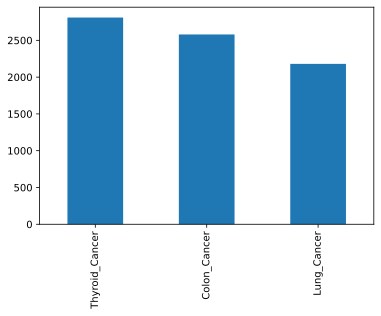

In [ ]:
biomedical_data_visualization_df[cancer_type_field].value_counts().plot(kind = 'bar')

### Manual way to Count the Words.

Unpack the sentences

In [ ]:
sentences = biomedical_data_visualization_df[cancer_desc_field].tolist()
sentence = " ".join(sentences)
sentence[:200]

'Thyroid surgery in  children in a single institution from Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud AlShanafeybFrom the  aDepartment of Surgery College '

In [ ]:
words = word_tokenize(sentence)
print(words[:10])

KeyboardInterrupt: ignored

In [ ]:
# count_words = np.unique(words, return_counts = True)
# print(f"Total Unique Words: {count_words[0].shape}")
# print(f"Total count of unique words: {count_words[1].shape}")

/usr/local/lib/python3.9/dist-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


['99mtc\x91labeled', 'nanocolloid', 'drugs', 'development', 'methodsVladimir', 'Sadkin1', 'Viktor', 'SÐºuridin1', 'Evgeny', 'Nesterov1', 'Elena', 'Stasyuk1', 'Alexander', 'Rogov1', 'Natalya', 'Varlamova1', 'Roman', 'Zelchan2The', 'work', 'considers', 'the', 'problem', 'of', 'obtaining', 'nanocolloid', 'radiopharmaceuticals', 'RPs', 'and', 'studying', 'their', 'functional', 'suitability', 'for', 'diagnosing', 'sentinel', 'lymph', 'nodes', 'SLN', 'in', 'cancer', 'patients', 'Two', 'principal', 'approaches', 'to', 'the', 'formation', 'of', 'technetium99mlabeled', 'ps', 'based', 'on', 'inanic', 'and', 'anic', 'matrices', 'were', 'considered', 'when', 'carrying', 'out', 'research', 'to', 'develop', 'methods', 'for', 'the', 'production', 'of', 'nanocolloid', 'RPs', 'The', 'composition', 'of', 'the', 'reagents', 'and', 'the', 'conditions', 'for', 'obtaining', 'nanocolloid', 'radiopharmaceuticals', 'were', 'determined', 'The', 'functional', 'suitability', 'of', 'new', 'RPs', 'for', 'scintigrap

In [ ]:
# count_words_df = pd.DataFrame({
#     "Word": count_words[0],
#     "Count": count_words[1],
# })

# count_words_df

Word  Count
0    tclabeled, nanocolloid, drugs, developmen...     10
1    [A, prediction, model, of, outcome, of, a0SARS...     10
2    [Activation, by, NaturalPhytochemicals, An, Ov...     10
3    [Acute, myeloid, leukemia, AML, is, a, complex...     10
4    [Adjunctive, Therapy, to, Achieve, Preoperativ...     10
..                                                 ...    ...
991  [to, the, human, gut, microbiota, biochem, tax...     10
992  [ulcerative, colitis, is, a, type, of, ammato...     10
993  [we, report, the, case, of, a, 24yearold, man,...     10
994  [ammation, is, an, established, risk, factor,...     10
995  [ammatory, bowel, disease, ibd, is, a, chroni...      9

[996 rows x 2 columns]

### Using SKLearn to get the distributions of the words.

This can be achieved by using CountVectorizer.

In [ ]:
biomedical_count_vectorizer = CountVectorizer(
  stop_words = list(biomedical_stopwords),
  min_df = 1,
)

biomedical_count_vectorizer.fit(biomedical_data_visualization_df[cancer_desc_field])

CountVectorizer(stop_words=['study', '83', '1012lhaptoglobin',
                            '101016jyexcr201702003', '101016jcell202004035',
                            '1650at', '422e', '871e', '3708b', '451bc',
                            '101016s0889852905702991', '437e', '3823154564',
                            '2a', 'them', '101136hrt2005072280', 'calculated',
                            "shan't", '132af', '12', '16ã', 'o',
                            '101042cs20191211activator', '4574e', '4bc',
                            '101016jvirol20150601', '1994e', '201a', '590e06pr',
                            '101136heartjnl2020317025', ...])

In [ ]:
word_matrix = biomedical_count_vectorizer.transform(
    biomedical_data_visualization_df[cancer_desc_field]
)

word_matrix

<7570x184885 sparse matrix of type '<class 'numpy.int64'>'
	with 7436952 stored elements in Compressed Sparse Row format>

In [ ]:
feature_maps = biomedical_count_vectorizer.get_feature_names_out()
print(feature_maps)
print(f"Length of feature maps: {len(feature_maps)}")

['a0' 'a001008' 'a010a' ... 'ïhypo' 'ïkcalmol' 'ï¼']
Length of feature maps: 184885


In [ ]:
count_per_words = word_matrix.sum(axis = 0)
print(f"Sum per Words Count Size: {count_per_words.shape}")

Sum per Words Count Size: (1, 184885)


In [ ]:
count_per_words_df = pd.DataFrame(
    count_per_words,
    columns = feature_maps,
).T
count_per_words_df.columns = ["Count"]
for word in count_per_words_df.index[:700]:
  print(f'"{word}",', end = " ")
# print(count_per_words_df.index[:800])

"a0", "a001008", "a010a", "a010bdifferentially", "a010g", "a010ldiscussionbreast", "a011254", "a016295", "a01a", "a01ab", "a01ac", "a01ato", "a01b", "a01bfam83h", "a01bgrowth", "a01bprotein", "a01c", "a01cfam83h", "a01d", "a01e", "a01ebinding", "a01efurther", "a01elbx2", "a01f", "a01g", "a01h", "a01i", "a01j", "a01k", "a01q", "a02017b", "a0265", "a028415", "a02a", "a02aalso", "a02ab", "a02agrowth", "a02anext", "a02ato", "a02b", "a02ba", "a02bb", "a02bc", "a02bcany", "a02bin", "a02bthe", "a02c", "a02d", "a02de", "a02e", "a02ehistomorphometric", "a02enext", "a02erhcadrm1", "a02f", "a02fthe", "a02g", "a02h", "a02i", "a02idiscussionwe", "a02j", "a02k", "a031203", "a03a", "a03ab", "a03acorrelation", "a03af", "a03ain", "a03b", "a03bassociations", "a03bc", "a03bin", "a03c", "a03cdinfiltration", "a03d", "a03dto", "a03e", "a03edetermination", "a03emir", "a03f", "a03g", "a03glbx2", "a03h", "a03i", "a04a", "a04aamong", "a04ain", "a04awe", "a04b", "a04c", "a04cd", "a04d", "a04e", "a04f", "a04g", "

See the distribution of the top 10 words.

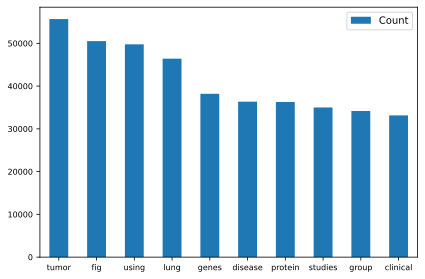

In [ ]:
count_per_words_head_df = count_per_words_df.sort_values(
    by = "Count", 
    ascending = False,
    ).head(10)

# ax.set_xticks(ticks =  rotation = 45)
count_per_words_head_df.plot(kind = 'bar', rot = 0, fontsize = 8)
plt.tight_layout()

### Using WordCloud to Visualize Frequent Words.

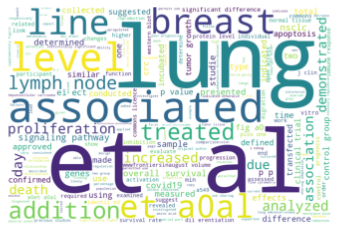

In [ ]:
cancer_desc_string = biomedical_data_visualization_df[cancer_desc_field].tolist()
cancer_desc_string = " ".join(cancer_desc_string)

word_cloud_plotting = WordCloud(
    width = 1200, height = 800, 
    background_color = "white", random_state = 100,
    stopwords = biomedical_stopwords
    )
word_cloud_plotting.generate(cancer_desc_string)

plt.axis("off")
plt.imshow(word_cloud_plotting)

## Data Modelling

Create Classification Models with these models:

* SVM
* Multinomial Naive Bayes

Copy the DataFrame first, so we don't have to run from the beginning of the cell code again.

In [ ]:
modelling_biomedical_data_df = preprocessed_biomedical_data_df.copy()

Perform Train Test Split, to split up between train and test split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    modelling_biomedical_data_df[cancer_desc_field], 
    modelling_biomedical_data_df[cancer_type_field], 
    test_size = 0.1)

print(f"X Train Data Shape: {X_train.shape}")
print(f"Y Train Data Shape: {y_train.shape}")

print(f"X Test Data Shape: {X_test.shape}")
print(f"Y Test Data Shape: {y_test.shape}")

X Train Data Shape: (6813,)
Y Train Data Shape: (6813,)
X Test Data Shape: (757,)
Y Test Data Shape: (757,)


Define all necessary models.

In [ ]:
# For Topic Modelling Task.
TOPIC_MODELLING_MAX_WORDS = 10000
biomedical_tm_tf_idf_vectorizer = TfidfVectorizer(stop_words = list(biomedical_stopwords), max_features = TOPIC_MODELLING_MAX_WORDS)
biomedical_tm_count_vectorizer = CountVectorizer(stop_words = list(biomedical_stopwords), max_features = TOPIC_MODELLING_MAX_WORDS)
nmf = NMF(n_components = 10) # Get only 5 topics.
lda = LatentDirichletAllocation(n_components = 10)

# For Classification Task.
biomedical_tf_idf_vectorizer = TfidfVectorizer(stop_words = list(biomedical_stopwords))

random_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()
naive_bayes = MultinomialNB()
svc = LinearSVC()

### Make Pipeline for easier training and testing purpose.

Add TfIdfVectorizer for tokenizing the sentences.

In [ ]:
word_matrix_train = biomedical_tf_idf_vectorizer.fit_transform(X_train)
word_matrix_test = biomedical_tf_idf_vectorizer.transform(X_test)

print(f"X Train Data Shape: {word_matrix_train.shape}")
print(f"X Test Data Shape: {word_matrix_test.shape}")

X Train Data Shape: (6813, 184885)
X Test Data Shape: (757, 184885)


Make Pipeline for Building Models.

In [ ]:
# For Topic Modelling
nmf_operations = [
    ('vectorizer', biomedical_tm_tf_idf_vectorizer),
    ('model', nmf),
]

lda_operations = [
    ('vectorizer', biomedical_tm_count_vectorizer),
    ('model', lda)
]

# For Classifications
random_forest_operations = [
    ('vectorizer',biomedical_tf_idf_vectorizer),
    ('random_forest', random_forest)
]

adaboost_operations = [
    ('vectorizer',biomedical_tf_idf_vectorizer),
    ('adaboost', adaboost)
]

svc_operations = [
    ('vectorizer',biomedical_tf_idf_vectorizer),
    ('svm', svc)
]

naive_bayes_operations = [
    ('vectorizer',biomedical_tf_idf_vectorizer),
    ('naive_bayes', naive_bayes)
]

In [ ]:
# For Topic Modelling
nmf_pipeline = Pipeline(nmf_operations)
lda_pipeline = Pipeline(lda_operations)

# For Classifications
random_forest_pipeline = Pipeline(random_forest_operations)
adaboost_pipeline = Pipeline(adaboost_operations)
naive_bayes_pipeline = Pipeline(naive_bayes_operations)
svc_pipeline = Pipeline(svc_operations)

### Simple Classification

Evaluate the Model (The model may take a very long time to run, so don't use )

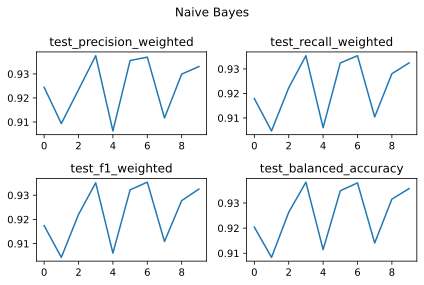

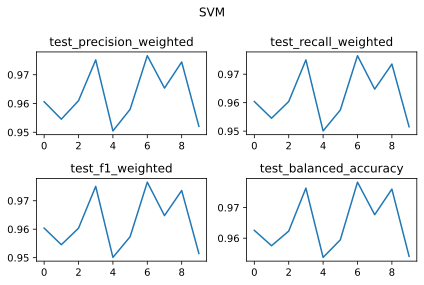

In [ ]:
def evaluate_classification_pipeline(pipeline, X_train, y_train, model_title):
  scorings = ['precision_weighted', 'recall_weighted', 'f1_weighted', 'balanced_accuracy']
  test_score_names = ["test_precision_weighted", "test_recall_weighted", "test_f1_weighted", "test_balanced_accuracy"]
  scores = cross_validate(pipeline, X_train, y_train, scoring = scorings, cv = 10,)

  # Plot Data
  N_ROWS = 2
  N_COLS = 2
  fig, axes = plt.subplots(nrows = 2, ncols = 2)
  fig.suptitle(model_title)

  score_index = 0
  for row_index in range(N_ROWS):
    for col_index in range(N_COLS):
      ax = axes[row_index][col_index]
      test_score_name = test_score_names[score_index]
      score = scores[test_score_name]
      score_index += 1

      ax.set_title(test_score_name)
      ax.plot(score)
  
  plt.tight_layout()
  plt.show()

def test_classification_pipeline(pipeline):
  # predictions = pipeline.predict(X_test)
  # predictions = 
  pass

classification_pipelines = [
    # random_forest_pipeline,
    # adaboost_pipeline,
    (naive_bayes_pipeline, "Naive Bayes"),
    (svc_pipeline, "SVM"),
]

for (pipeline, title) in classification_pipelines:
  evaluate_classification_pipeline(pipeline, X_train, y_train, title)

#### Model Analysis

Fit each of the models.

In [ ]:
naive_bayes_pipeline.fit(X_train, y_train,)
svc_pipeline.fit(X_train, y_train,)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['study', '83', '1012lhaptoglobin',
                                             '101016jyexcr201702003',
                                             '101016jcell202004035', '1650at',
                                             '422e', '871e', '3708b', '451bc',
                                             '101016s0889852905702991', '437e',
                                             '3823154564', '2a', 'them',
                                             '101136hrt2005072280',
                                             'calculated', "shan't", '132af',
                                             '12', '16ã', 'o',
                                             '101042cs20191211activator',
                                             '4574e', '4bc',
                                             '101016jvirol20150601', '1994e',
                                             '201a', '590e06pr',
                                             '101136heartjnl2020317025', ...])),
                ('svm', LinearSVC())])

#### Coefficient Analysis

See SVM's coefficient, to see the importance for each of the features.

In [ ]:
# X Train Data Shape: (6813, 197299)
# X Test Data Shape: (757, 197299)
svc_coefficients = svc_pipeline["svm"].coef_
svc_coefficients.shape

(3, 184885)

In [ ]:
vectorizer_feature_maps = svc_pipeline["vectorizer"].get_feature_names_out()
print(vectorizer_feature_maps)

svc_coefficients_df = pd.DataFrame(
    svc_coefficients,
    columns = vectorizer_feature_maps
)
svc_coefficients_df

['a0' 'a001008' 'a010a' ... 'ïhypo' 'ïkcalmol' 'ï¼']


a0   a001008     a010a  a010bdifferentially     a010g  \
0 -0.162348 -0.002519 -0.013585            -0.007881 -0.006965   
1 -1.016060  0.005627 -0.001854            -0.002038 -0.000002   
2  1.121943 -0.000545  0.016321             0.010535  0.007315   

   a010ldiscussionbreast       a011254   a016295      a01a     a01ab  ...  \
0              -0.006965  8.315826e-04  0.014941 -0.043858 -0.011925  ...   
1              -0.000002  0.000000e+00 -0.003167 -0.029092 -0.017152  ...   
2               0.007315  2.791821e-18 -0.010218  0.076731  0.029440  ...   

   î¼mthick    î¼mxrd  î¼pccchangeï   î¼umle2        î¾       î¾i        îî  \
0  0.027019  0.008473      0.019003 -0.004236  0.118941  0.039647  0.077102   
1 -0.009357 -0.003924     -0.003568 -0.001642 -0.020573 -0.006858 -0.017621   
2 -0.017207 -0.004839     -0.014980  0.005730 -0.094524 -0.031508 -0.057350   

      ïhypo  ïkcalmol        ï¼  
0 -0.014116  0.009853 -0.455716  
1 -0.006387 -0.003337 -0.010687  
2  0.021757 -0.006638  0.401307  

[3 rows x 184885 columns]

In [ ]:
svc_coefficients_df.mean(axis = 0).sort_values(ascending = True).head(15)

journal      -0.129006
s2           -0.120301
al           -0.101754
covid19      -0.088280
anti         -0.081532
et           -0.081021
lung         -0.077509
oleifera     -0.073227
nsclc        -0.067544
asbestos     -0.065385
microbiota   -0.060594
oncology     -0.058733
mir          -0.056994
pi3k         -0.056934
a549         -0.055558
dtype: float64

In [ ]:
svc_coefficients_df.mean(axis = 0).sort_values(ascending = False).head(15)

local          0.028983
pfs            0.027846
chq            0.026733
rtpcr          0.026431
mmp            0.026409
emt            0.025506
plc            0.025022
kd             0.023682
propolis       0.023678
fgf2           0.023605
rp11           0.022558
cxcl8          0.022182
asthma         0.021625
perfringens    0.021129
median         0.020936
dtype: float64

#### SHAPValue Analysis

In [ ]:
biomedical_tf_idf_vectorizer_shap = TfidfVectorizer(stop_words = list(biomedical_stopwords), max_features=10000)
tf_idf_train_word_matrix = biomedical_tf_idf_vectorizer_shap.fit_transform(X_train)
tf_idf_test_word_matrix = biomedical_tf_idf_vectorizer_shap.transform(X_test)

naive_bayes.fit(tf_idf_train_word_matrix, y_train)
svc.fit(tf_idf_train_word_matrix, y_train)

biomedical_feature_names = biomedical_tf_idf_vectorizer_shap.get_feature_names_out()
print(biomedical_feature_names)

['a0' 'a01a' 'a01b' ... 'î¼l' 'î¼m' 'ï¼']


Fit the explainer

In [ ]:
svc_explainer = shap.Explainer(
    svc,
    tf_idf_train_word_matrix.toarray(),
    feature_names = biomedical_feature_names
)


svc_shap_values = svc_explainer(tf_idf_test_word_matrix.toarray(), max_evals = 30000)
print(svc_shap_values.shape)

(757, 10000, 3)


See sample of global features.

In [ ]:
MAX_LABELS = 3
labels = svc.classes_
print(f"Labels available for this model: {labels}")

Labels available for this model: ['Colon_Cancer' 'Lung_Cancer' 'Thyroid_Cancer']


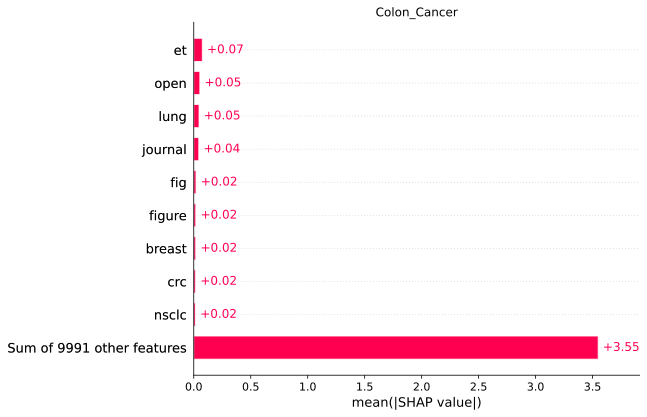

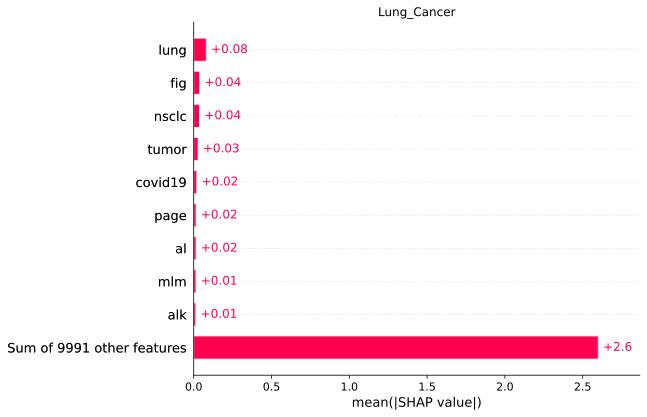

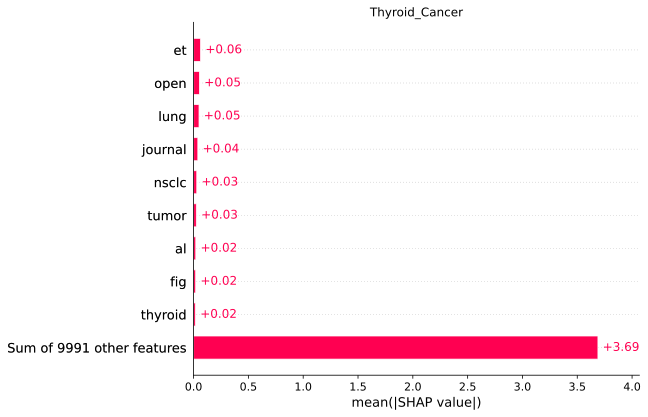

In [ ]:
for label_index, label in enumerate(labels):
  plt.title(label)
  shap.plots.bar(svc_shap_values[:, :, label_index], max_display = 10)

In [ ]:
for label_index, label in enumerate(labels):
  plt.title(label)
  shap.summary_plot(svc_shap_values[:, :, label_index], plot_type='violin')

### Topic Modelling

Train the models.

In [ ]:
topic_modelling_pipelines = [
    (nmf_pipeline, "NMF"),
    (lda_pipeline, "LDA"),
]

for pipeline, _ in topic_modelling_pipelines:
  pipeline.fit(modelling_biomedical_data_df[cancer_desc_field])

Visualize The top 10 words that belong to each category.

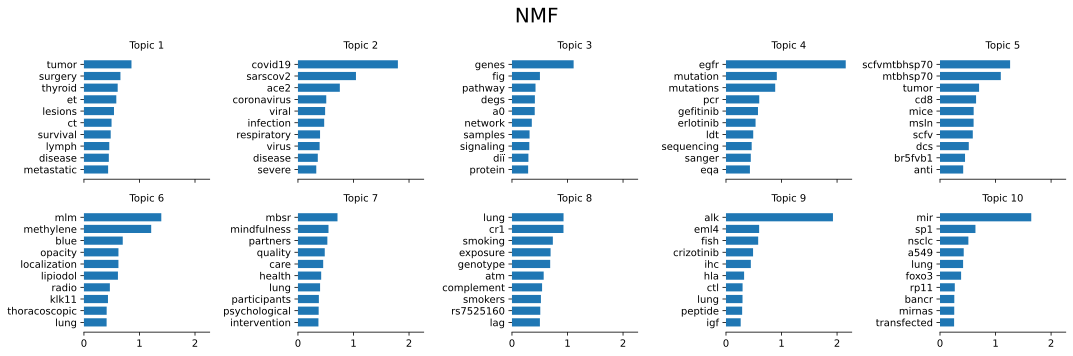

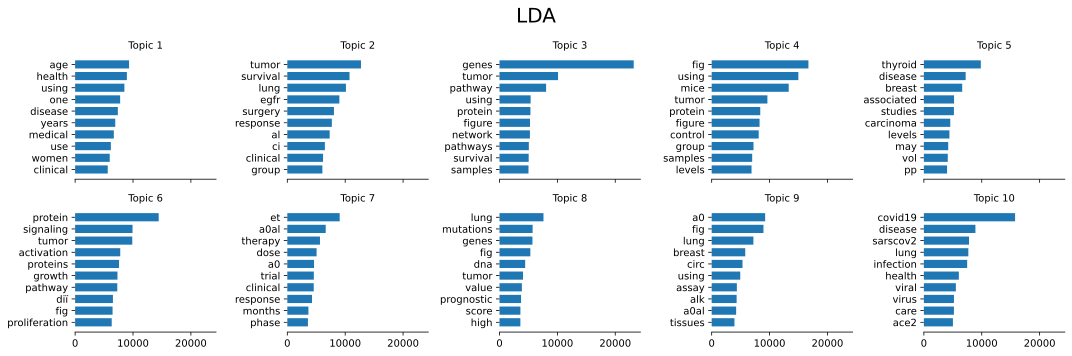

In [ ]:
def plot_top_words(model, feature_names, n_top_words = 10, title = "Model"):
    fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize=(15, 5), sharex = True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 10})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=10)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)

for pipeline, model_title in topic_modelling_pipelines:
  feature_names = pipeline["vectorizer"].get_feature_names_out()
  plot_top_words(pipeline["model"], feature_names, title = model_title)
  plt.tight_layout()
  plt.show()

#### Model Testing

In [ ]:
topic_modelling_data = X_train
Z = nmf_pipeline.transform(topic_modelling_data)
topic_names = ["Tumor Cure Methods", "Coronavirus", "Interactions in Cells", "Mutations", "Mice Genes", 
               "Tumor Cells", "Mental Health", "Immune Boosters", "Signal Activity", "Cure Cells for Cancer",]

Assuming from the distributions above, we choose NMF, because it's the best performance of all of the models, since it has the most representation words to determine the topics.

Now, let's display the output of the model, by using test sample from our dataset.

<Figure size 1080x360 with 0 Axes>

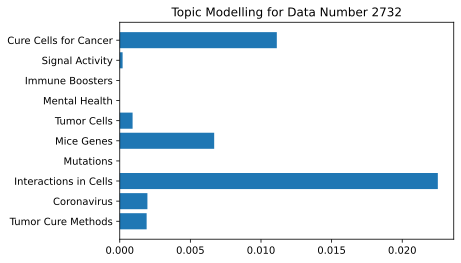

In [ ]:
np.random.seed(0)

def wrap(text):
    return textwrap.fill(text, replace_whitespace=False, fix_sentence_endings=True)

def get_img_distribution_topics(Z_one_data, model, topic_names = []):
  plt.figure(figsize = (15, 5))
  topic_indexes = np.arange(0, len(model.components_))

  if len(topic_names) == 0:
    print("Using numbered index for topic names...")
    topic_names = topic_indexes
  elif len(model.components_) != len(topic_names):
    raise ValueError(f"Length of topic names don't match with number of components ({len(model.components_)}) in the model.")

  fig, ax = plt.subplots(nrows = 1, ncols = 1)
  ax.barh(topic_names, Z_one_data)
  ax.set_yticks(topic_names)
  return fig, ax

biomedical_data_index = np.random.choice(len(topic_modelling_data))
fig, ax = get_img_distribution_topics(
    Z[biomedical_data_index], 
    nmf_pipeline["model"],
    topic_names,
)

ax.set_title(f"Topic Modelling for Data Number {biomedical_data_index}") # Compare with topic 10, whether it correlates with the plot before.
plt.show()

See the example of the text, given the sample data before.

In [ ]:
print(f"Text Content for index: {biomedical_data_index}")
print(wrap(modelling_biomedical_data_df.iloc[biomedical_data_index][cancer_desc_field]))

Text Content for index: 2732
interferon covid19sarscov2iranin this study efficacy and safety of
interferon interferon beta1 b in the treatment of patients with severe
covid19 wereevaluatedamong an label randomized clinical trial adult
patients ¥ years old with severe covid19 wererandomly assigned to the
ifn group or the control group patients in the ifn group received
interferon beta1 b mcg subcutaneously every other day for two
consecutive weeks along with the national protocol medicationswhile in
the control group patients received only the national protocol
medications lopinavirritonavir oratazanavirritonavir plus
hydroxychloroquine for  days the primary outcome of the study was
time toclinical improvement secondary outcomes were inhospital
complications and april and may patients were enrolled and finally
patients in each group completed the study time to clinical improvment
in the ifn group was significantly shorter than the control group  vs
 days respectively p hr ci  at da